# 1.Download the dataset:

# 2.Load the dataset into the tool:

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [206]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Perform Below Visualizations:

# ∙ Univariate Analysis

In [207]:
%matplotlib inline

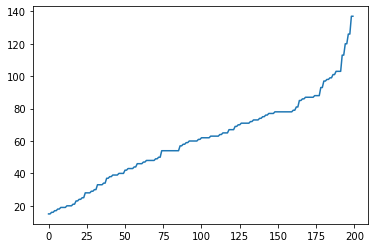

In [208]:
plt.plot(df['Annual Income (k$)'])
plt.show()

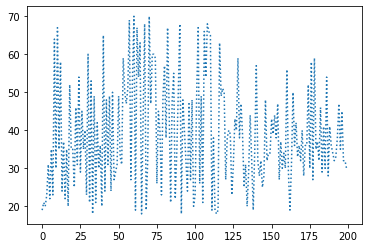

In [209]:
data=np.array(df['Age'])
plt.plot(data,linestyle = 'dotted')

<AxesSubplot:xlabel='Age', ylabel='count'>

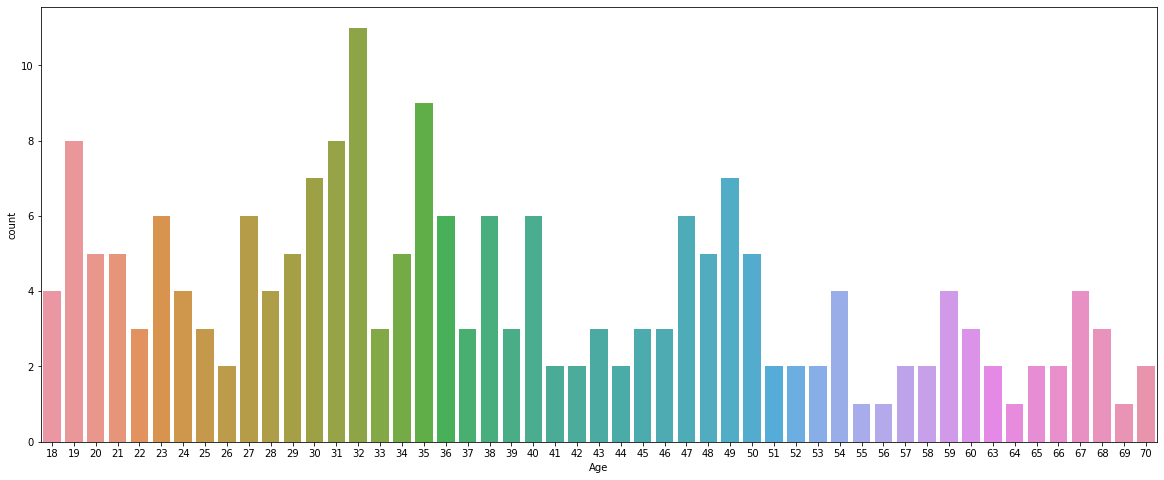

In [210]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(x=df['Age'])

<AxesSubplot:ylabel='Density'>

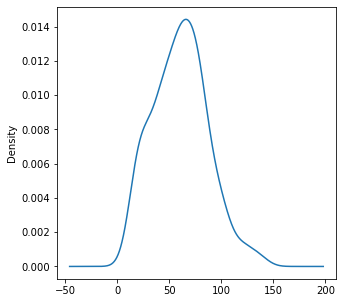

In [211]:
plt.rcParams['figure.figsize'] = (5,5)
df['Annual Income (k$)'].plot(kind='density')

<AxesSubplot:xlabel='Gender', ylabel='count'>

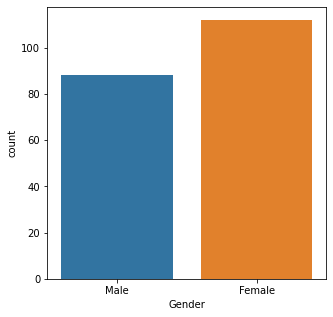

In [212]:
sns.countplot(x=df['Gender'])

<AxesSubplot:ylabel='Annual Income (k$)'>

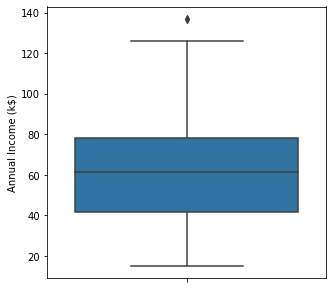

In [213]:
sns.boxplot(y=df['Annual Income (k$)'])

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

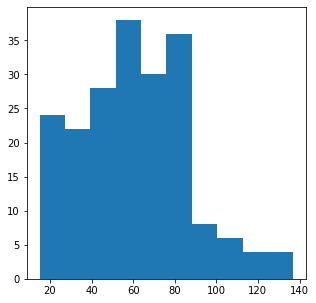

In [214]:
plt.hist(x=df['Annual Income (k$)'])

# ∙ Bi- Variate Analysis

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

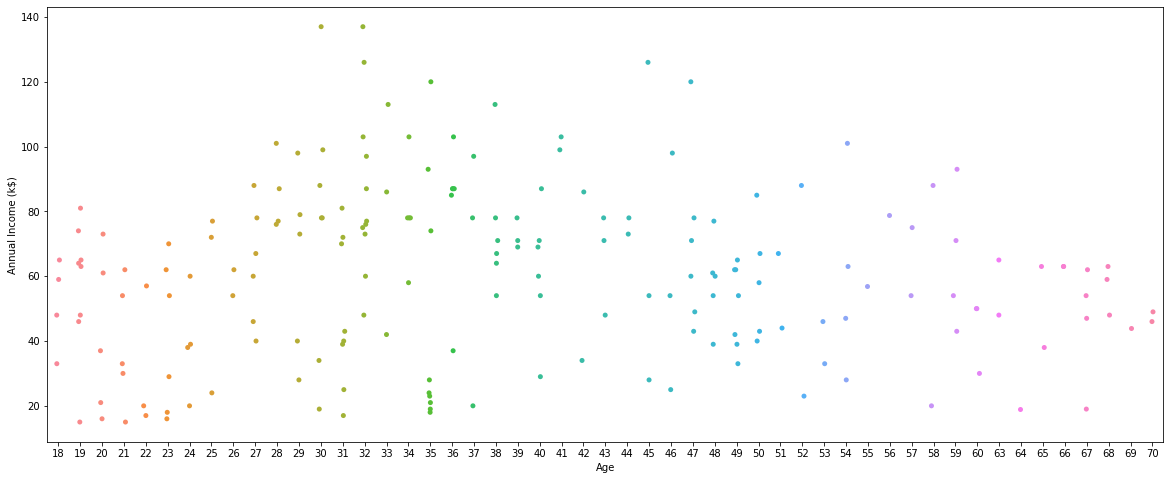

In [215]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.stripplot(x=df['Age'],y=df['Annual Income (k$)'])

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

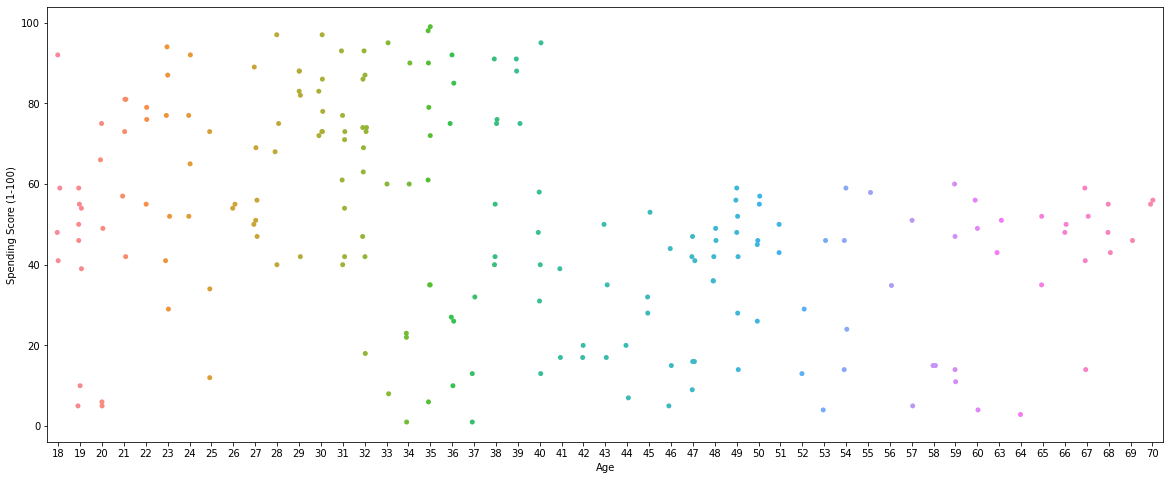

In [216]:
sns.stripplot(x=df['Age'],y=df['Spending Score (1-100)'])

Text(0, 0.5, 'Annual Income (k$)')

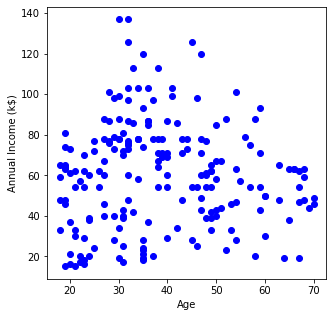

In [217]:
plt.rcParams['figure.figsize'] = (5,5)
plt.scatter(df['Age'],df['Annual Income (k$)'],color='blue')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

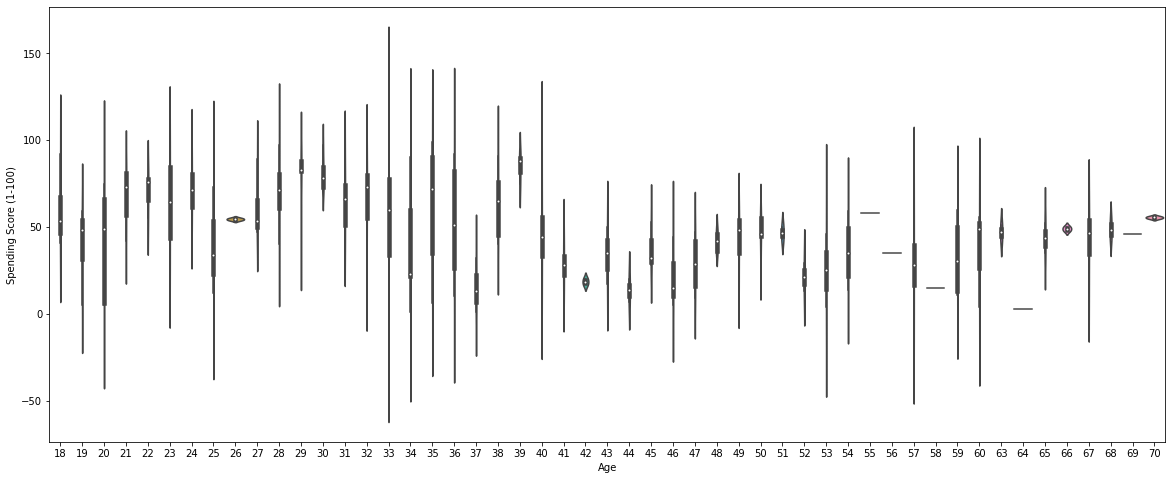

In [218]:
plt.rcParams['figure.figsize'] = (20,8)
sns.violinplot(x ='Age', y ='Spending Score (1-100)', data = df)

# ∙ Multi-Variate Analysis

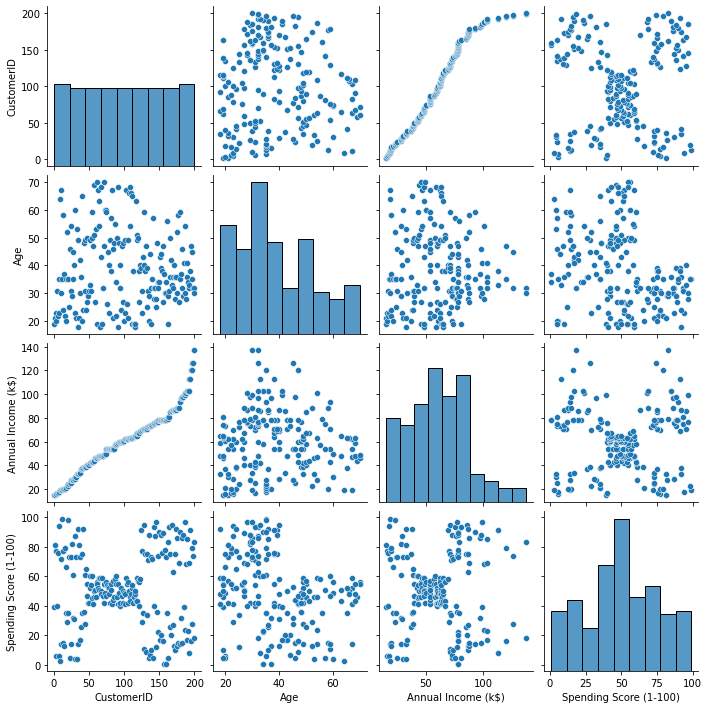

In [219]:
sns.pairplot(df)

# 4.Perform descriptive statistics on the dataset.

<AxesSubplot:>

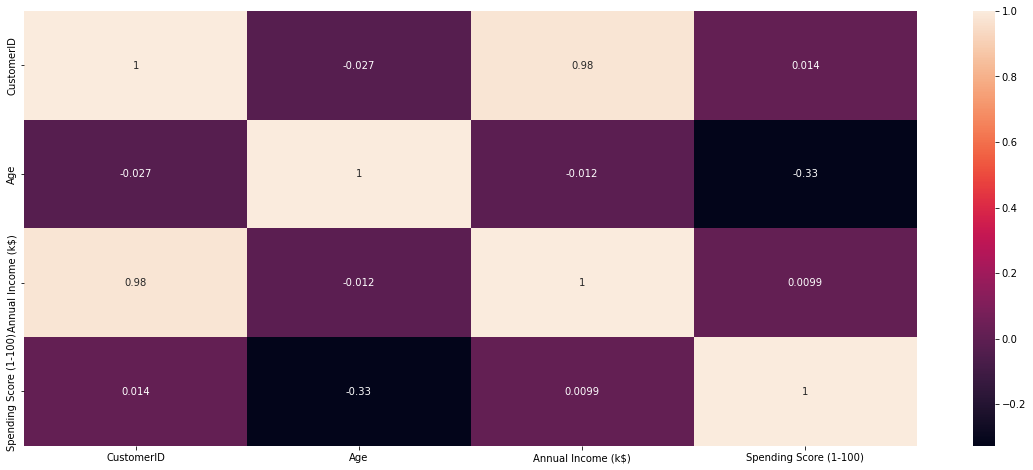

In [220]:
sns.heatmap(df.corr(),annot=True)

In [221]:
df.shape

(200, 5)

In [222]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [224]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [225]:
df.mean(numeric_only=True)

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [226]:
df.median(numeric_only=True)

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [227]:
df.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [228]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

#  5.Check for Missing values and deal with them.

In [229]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#  6.Find the outliers and replace them outliers 

<AxesSubplot:xlabel='Annual Income (k$)'>

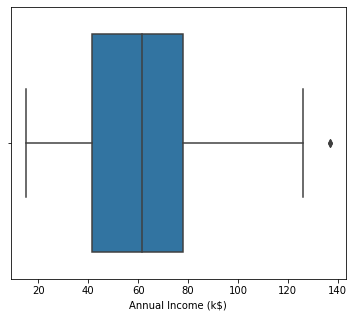

In [230]:
plt.rcParams['figure.figsize'] = (6,5)
sns.boxplot(x=df['Annual Income (k$)'])

In [231]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_whisker,upper_whisker,np.where(df['Annual Income (k$)']<lower_whisker,lower_whisker,df['Annual Income (k$)']))

<AxesSubplot:xlabel='Annual Income (k$)'>

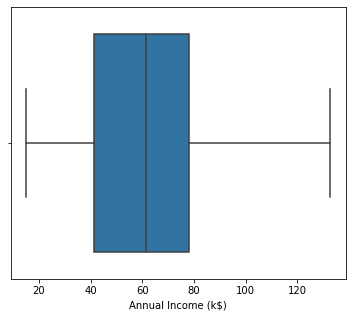

In [232]:
sns.boxplot(x=df['Annual Income (k$)'])

# 7.Check for Categorical columns and perform encoding.

In [233]:
numeric_data = df.select_dtypes(include=[np.number]) 
categorical_data = df.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  4
Number of categorical variables:  1


In [234]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Categorical_variables = list(categorical_data.columns)
Categorical_variables

Number of categorical variables:  1


['Gender']

In [235]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [236]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Gender'])
df["Gender"] = label

In [237]:
df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

# 8. Scaling the data

In [238]:
X = df.drop("Age",axis=1)
Y = df['Age']

In [239]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[-1.7234121   1.12815215 -1.74542941 -0.43480148]
 [-1.70609137  1.12815215 -1.74542941  1.19570407]
 [-1.68877065 -0.88640526 -1.70708307 -1.71591298]
 [-1.67144992 -0.88640526 -1.70708307  1.04041783]
 [-1.6541292  -0.88640526 -1.66873673 -0.39597992]
 [-1.63680847 -0.88640526 -1.66873673  1.00159627]
 [-1.61948775 -0.88640526 -1.6303904  -1.71591298]
 [-1.60216702 -0.88640526 -1.6303904   1.70038436]
 [-1.5848463   1.12815215 -1.59204406 -1.83237767]
 [-1.56752558 -0.88640526 -1.59204406  0.84631002]
 [-1.55020485  1.12815215 -1.59204406 -1.4053405 ]
 [-1.53288413 -0.88640526 -1.59204406  1.89449216]
 [-1.5155634  -0.88640526 -1.55369772 -1.36651894]
 [-1.49824268 -0.88640526 -1.55369772  1.04041783]
 [-1.48092195  1.12815215 -1.55369772 -1.44416206]
 [-1.46360123  1.12815215 -1.55369772  1.11806095]
 [-1.4462805  -0.88640526 -1.51535138 -0.59008772]
 [-1.42895978  1.12815215 -1.51535138  0.61338066]
 [-1.41163905  1.12815215 -1.43865871 -0.82301709]
 [-1.39431833 -0.88640526 -1.43

In [240]:
X_scaled  = pd.DataFrame(scale, columns = X.columns)
X_scaled

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.745429,-0.434801
1,-1.706091,1.128152,-1.745429,1.195704
2,-1.688771,-0.886405,-1.707083,-1.715913
3,-1.671450,-0.886405,-1.707083,1.040418
4,-1.654129,-0.886405,-1.668737,-0.395980
...,...,...,...,...
195,1.654129,-0.886405,2.280936,1.118061
196,1.671450,-0.886405,2.511014,-0.861839
197,1.688771,1.128152,2.511014,0.923953
198,1.706091,1.128152,2.769852,-1.250054


# 9.Perform any of the clustering algorithms and 10. Add the cluster data with the primary dataset

In [241]:
x = df.iloc[:, [3, 4]].values  

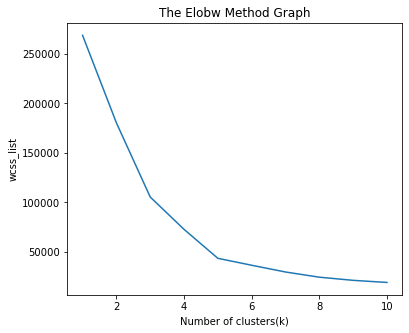

In [242]:
from sklearn.cluster import KMeans  
import warnings
warnings.filterwarnings('ignore')
wcss_list= []   
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show() 


In [243]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

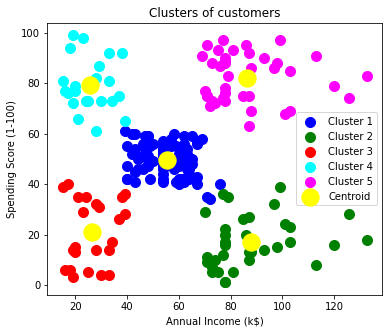

In [244]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

# 11.Split the data into dependent and independent

In [245]:
y=df["Age"]
y.head()

0    19
1    21
2    20
3    23
4    31
Name: Age, dtype: int64

In [246]:
x=df.drop(columns=["Age"],axis=1)
x.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,1,1,15.0,39
1,2,1,15.0,81
2,3,0,16.0,6
3,4,0,16.0,77
4,5,0,17.0,40


# Scale the independent variables

In [247]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.745429,-0.434801
1,-1.706091,1.128152,-1.745429,1.195704
2,-1.688771,-0.886405,-1.707083,-1.715913
3,-1.671450,-0.886405,-1.707083,1.040418
4,-1.654129,-0.886405,-1.668737,-0.395980


# 12.Split the data into training and testing

In [248]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [249]:
X_Train.shape,X_Test.shape

((160, 4), (40, 4))

In [250]:
Y_Train.shape,Y_Test.shape

((160,), (40,))

In [251]:
X_Train.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
134,0.597565,1.128152,0.478658,-1.754735
66,-0.580244,-0.886405,-0.480000,-0.007764
26,-1.273073,-0.886405,-1.246927,-0.706552
113,0.233830,1.128152,0.133541,-0.163051
168,1.186470,-0.886405,1.015507,-0.900660


In [252]:
X_Test.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
18,-1.411639,1.128152,-1.438659,-0.823017
170,1.221111,1.128152,1.015507,-1.444162
107,0.129905,1.128152,0.095195,-0.163051
98,-0.025981,1.128152,0.018502,-0.318337
177,1.342356,1.128152,1.053853,0.729845


In [253]:
Y_Train.head()

134    20
66     43
26     45
113    19
168    36
Name: Age, dtype: int64

In [254]:
Y_Test.head()

18     52
170    40
107    54
98     48
177    27
Name: Age, dtype: int64

# 13.Build the Model

In [255]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [256]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [257]:
y_predict = model.predict(X_Test)

In [258]:
y_predict_train = model.predict(X_Train)

# 14.Train the Model

In [259]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [260]:
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

Training accuracy:  0.94375


# 15.Test the Model

In [261]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))

Testing accuracy:  0.05


# 16. Measure the performance using Metrics

In [262]:
pd.crosstab(Y_Test,y_predict)

col_0,18,21,23,24,25,27,28,30,31,32,...,40,41,49,50,54,58,59,63,68,69
Age,,,,,,,,,,,,,,,,,,,,,
18,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
22,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
30,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [263]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          23       0.50      1.00      0.67         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.33      0.33      0.33         3
          31       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          38       0.00    